<a href="https://colab.research.google.com/github/jahidhasan299/jahidhasan299-Deep-Learning-With-7-Real-Projects/blob/main/How_to_Develop_a_CNN_From_Scratch_for_CIFAR_10_Photo_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library and data

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Spliting the dataset
The best way to scale the pixel values for modeling,some scaling will be required.

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [25]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)


# Ploting the data labelwise

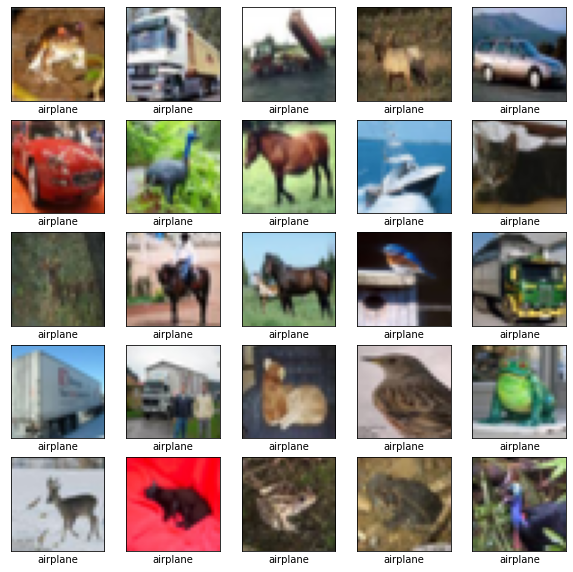

In [29]:
import matplotlib.pyplot as plt
(_, _), (_, labels) = cifar10.load_data()
idx = [3, 6, 25, 46, 58, 85, 93, 108, 133]
clsmap = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(clsmap[y_train[i][0]])
plt.show()

# Create the convolutional base

In [39]:
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
# Dimentionality of input and latent encoded representions
input_dim = (32, 32, 3)
input_img = Input(shape=input_dim)
# Convution layer
c11 = Conv2D(64,(9,9), strides=(2, 2), input_shape = input_dim, activation= 'relu')(input_img)
# Polling and BatchNormalization
p12 = MaxPooling2D(pool_size=(2,2))(c11)
bn13 = BatchNormalization()(p12)

# Add a second convolution layer
c14 = Conv2D(128,(3,3), strides=(1,1), activation= 'relu')(bn13)
p15 = MaxPooling2D(pool_size = (2, 2))(c14)
bn16 = BatchNormalization()(p15)

# Flattening for compatibility
f17 = Flatten()(bn16)
# Dense layers + Dropout
do18 = Dropout(0.5)(f17)
d19 = Dense(units= 256, activation='relu')(do18)
do20 = Dropout(0.2)(d19)
d21 = Dense(units= 64, activation='relu')(do20)
do22 = Dropout(0.1)(d21)
output = Dense(units=10, activation='sigmoid')(do22)

classifier = Model(input_img, output)

In [40]:
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        15616     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 128)        0     

# Compile_and_train_the_model using convax model

Fitting the CNN to the images

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_delta=1e-4, mode='min', verbose=1)
stop_alg = EarlyStopping(monitor='val_loss', patience=35, restore_best_weights=True, verbose=1)
hist = classifier.fit(x_train, y_train, batch_size= 100, epochs=100, callbacks=[stop_alg, reduce_lr], shuffle=True, validation_data=(x_test, y_test))
classifier.save_weights("cnn.hdf5")

# Evaluate the model

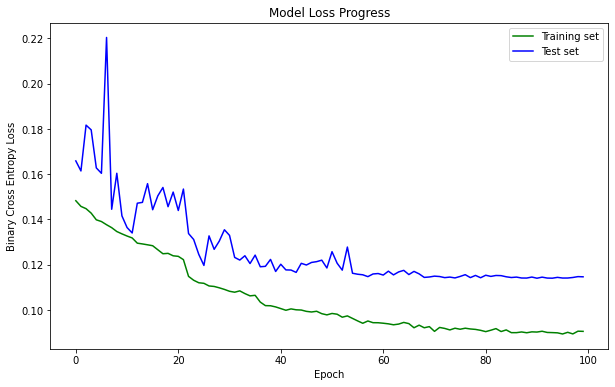

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], color='green')
plt.plot(hist.history['val_loss'], color='blue')
plt.title("Model Loss Progress")
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper right')
plt.show()

# Numerical Results

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
import numpy as np

(_, _), (_, labels) = cifar10.load_data()
y_ = labels
y_hat = classifier.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(classification_report(np.argmax(y_test, axis=1),np.argmax(y_hat, axis=1), labels=[1,2,3,4,5,6,7,8,9]))

cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_hat, axis=1),labels=[1,2,3,4,5,6,7,8,9])

print(cm)
ber = 1-balanced_accuracy_score(np.argmax(y_test, axis=1),np.argmax(y_hat, axis=1))
print('BER', ber)

              precision    recall  f1-score   support

           1       0.88      0.85      0.86      1000
           2       0.73      0.62      0.67      1000
           3       0.56      0.62      0.59      1000
           4       0.72      0.76      0.74      1000
           5       0.66      0.65      0.65      1000
           6       0.85      0.82      0.83      1000
           7       0.79      0.80      0.80      1000
           8       0.88      0.86      0.87      1000
           9       0.82      0.84      0.83      1000

   micro avg       0.76      0.76      0.76      9000
   macro avg       0.76      0.76      0.76      9000
weighted avg       0.76      0.76      0.76      9000

[[849   6  12   4   3   8   2  20  81]
 [  3 624  85  77  58  50  29   5   7]
 [ 10  45 625  54 160  30  36   8  16]
 [  0  42  58 759  27  25  63   7   1]
 [  0  37 177  47 653  17  48   1   9]
 [  7  26  58  34  32 821   6   9   4]
 [  1  18  48  57  48   5 800   2   9]
 [ 24   6  19   4   4 

# Vissualizing Gabor fillters

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


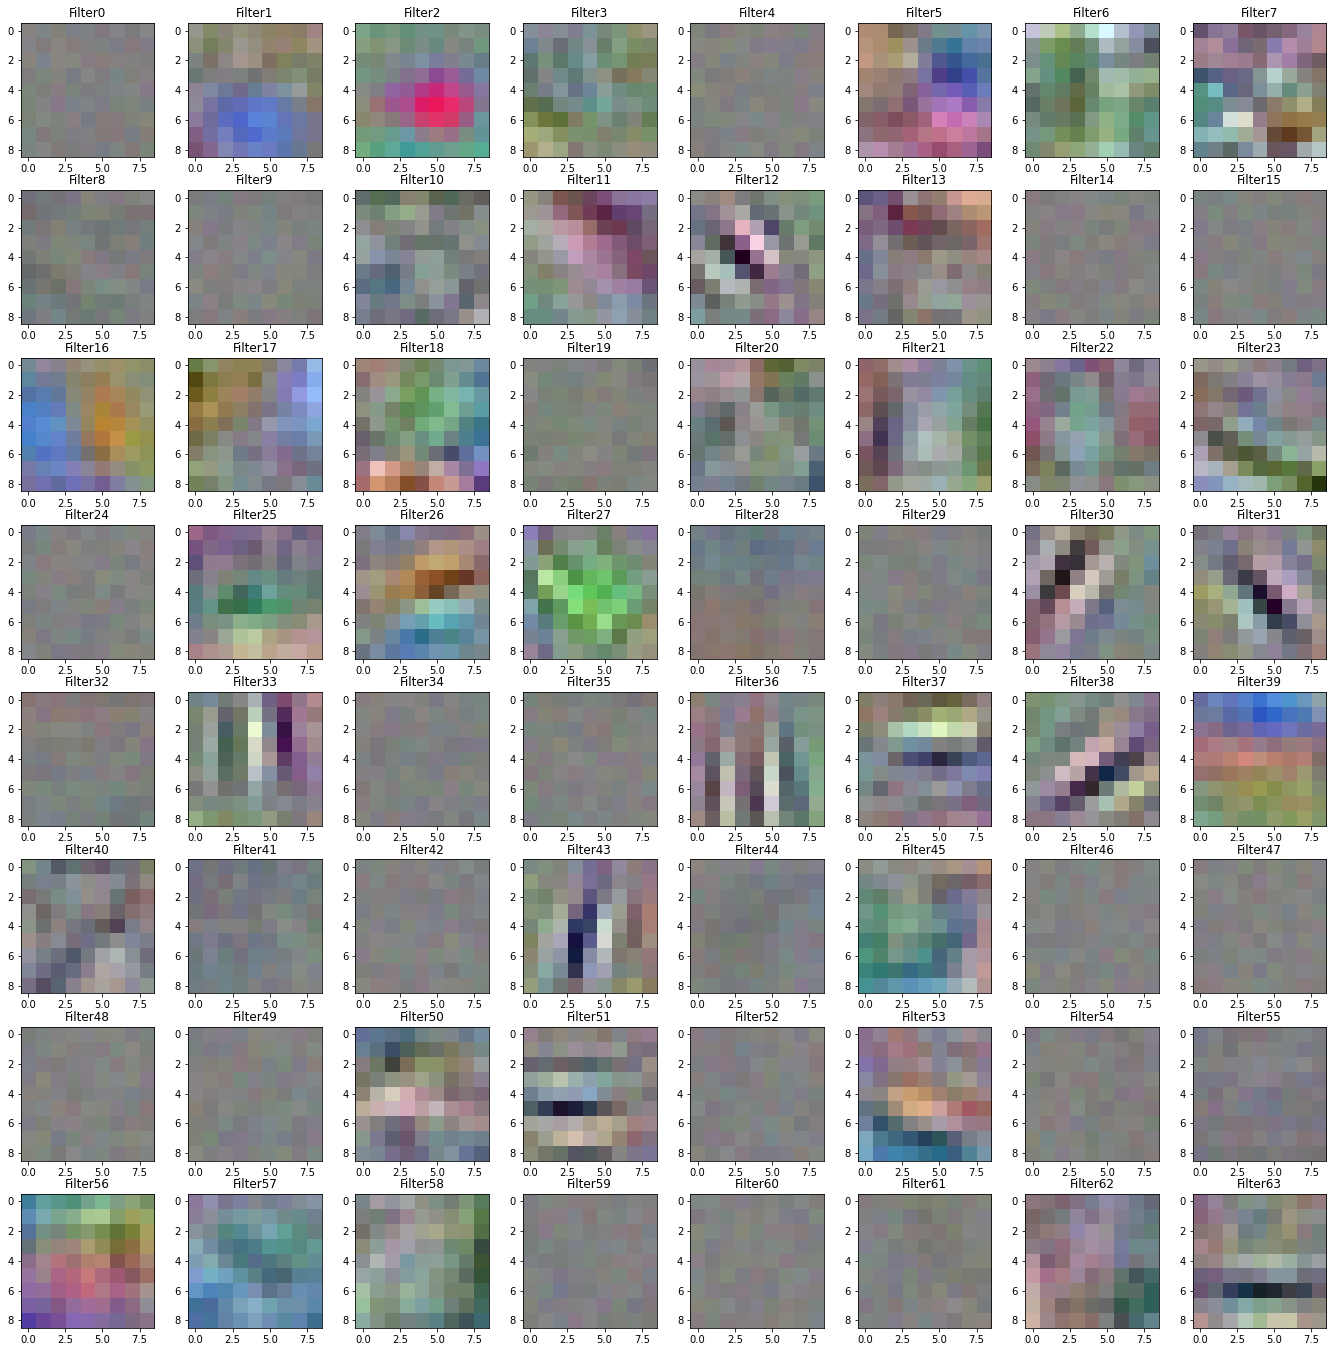

In [56]:
from sklearn.preprocessing import MinMaxScaler
cnn11 = classifier.layers[1].name # get the name of 1st convolution layer
w = classifier.get_layer(name=cnn11).get_weights()[0] # get the filters
wshape = w.shape # save the original shape
# Scale to [0,1] for vissualizaiton purposes
scaler = MinMaxScaler()
scaler.fit(w.reshape(-1,1))
w = scaler.transform(w.reshape(-1,1))
w = w.reshape(wshape)
# Display them 8 * 8
fig, axs  = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace=.25, wspace=.001)
axs = axs.ravel()
for i in range(w.shape[-1]):
  # Reshape to a 30 (RGB) image shape and display
  h = np.reshape(w[:,:,:,i],(9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter' + str(i))
